### K-Mers Extraction and Export it into .csv Files

Written by : Ryan Ananda Nolly

My Github : [Link](github.com/ryannolly)

I made this program to help me extract the data of Metagenom's Sequence using K-Mers Extraction to fulfill my Bioinformatics assignment. First We Input the .txt file of the result of Metasim Sequencing. And after that upload it to Google Colaboratory and change the path provided in the program

The .txt file will look something like this : 

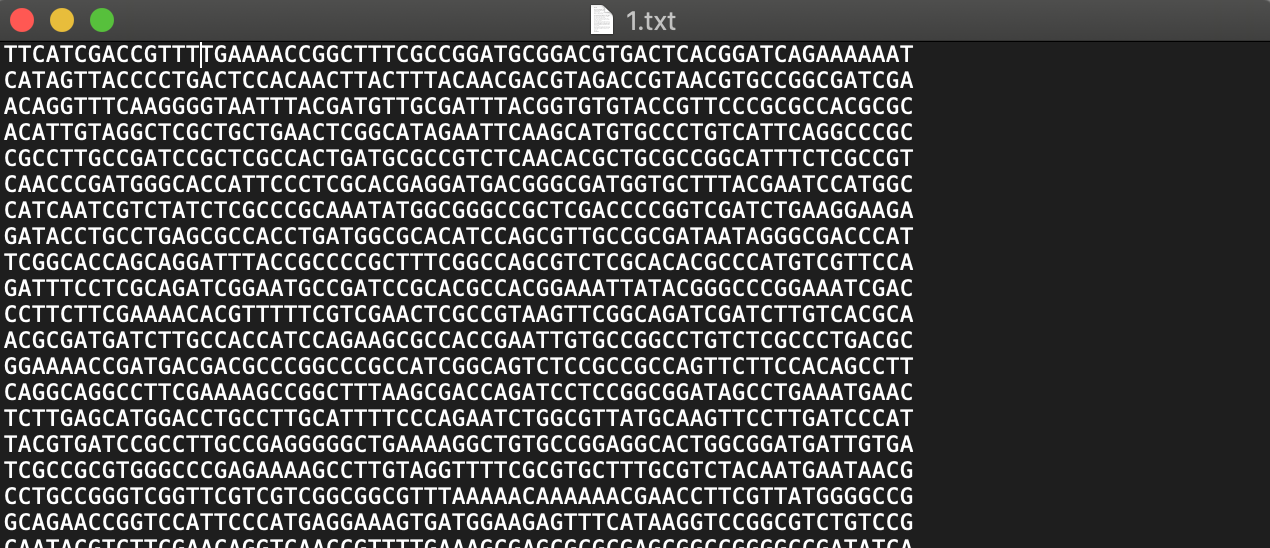

### 1. First run the program below to define the function that we will use and see the example result.

In [1]:
def permutation(text, depth, hasil_permutasi, permutasi, panjangK) :
  if depth >= panjangK : 
    hasil_permutasi[permutasi] = 0
  else : 
    for i in range(len(text)):
      permutasi = permutasi[0:depth] + text[i] + permutasi[depth:panjangK-1]
      permutation(text, depth+1, hasil_permutasi, permutasi, panjangK)

def k_mers(metagenom, k) :
  hasil_kmers = {}
  permutasi = ""
  permutation("ATGC", 0, hasil_kmers, permutasi, k) #insert your K here
  data = hasil_kmers
  for i in range(len(metagenom) - k+1) : 
    data[metagenom[i:i+k]] = data[metagenom[i:i+k]] + 1
  return data

### For Example of the Extraction of One Reads
a = k_mers("TTCATCGACCGTTTTGAAAACCGGCTTTCGCCGGATGCGGACGTGACTCACGGATCAGAAAAAAT",3) #Insert your string and K Here
print(len("TTCATCGACCGTTTTGAAAACCGGCTTTCGCCGGATGCGGACGTGACTCACGGATCAGAAAAAAT"))
print("Number of Feature : {}".format(len(a.keys())))
print("\nExtraction Result : ")
print(a)

65
Number of Feature : 64

Extraction Result : 
{'AAA': 6, 'AAT': 1, 'AAG': 0, 'AAC': 1, 'ATA': 0, 'ATT': 0, 'ATG': 1, 'ATC': 2, 'AGA': 1, 'AGT': 0, 'AGG': 0, 'AGC': 0, 'ACA': 0, 'ACT': 1, 'ACG': 2, 'ACC': 2, 'TAA': 0, 'TAT': 0, 'TAG': 0, 'TAC': 0, 'TTA': 0, 'TTT': 3, 'TTG': 1, 'TTC': 2, 'TGA': 2, 'TGT': 0, 'TGG': 0, 'TGC': 1, 'TCA': 3, 'TCT': 0, 'TCG': 2, 'TCC': 0, 'GAA': 2, 'GAT': 2, 'GAG': 0, 'GAC': 3, 'GTA': 0, 'GTT': 1, 'GTG': 1, 'GTC': 0, 'GGA': 3, 'GGT': 0, 'GGG': 0, 'GGC': 1, 'GCA': 0, 'GCT': 1, 'GCG': 1, 'GCC': 1, 'CAA': 0, 'CAT': 1, 'CAG': 1, 'CAC': 1, 'CTA': 0, 'CTT': 1, 'CTG': 0, 'CTC': 1, 'CGA': 1, 'CGT': 2, 'CGG': 4, 'CGC': 1, 'CCA': 0, 'CCT': 0, 'CCG': 3, 'CCC': 0}


### 2. Then, We Will specify the name of the file below (Make sure the file is already uploaded if you use Google Collaboratory

In [45]:
files_name = "agrobacterium_Vitis.fna" #this is where to change the name file
data_name = "AV" #this is where you change the data name that will appear in csv
k_number = 3 #This is where you change the K 
csv_file_name = "Agrobacterium_Vitis.csv" #this is where you change the csv file name. Make sure you dont delete .csv
label_name = "Agrobacterium Vitis" #This is where you change the label name.

### 3. Lastly, run the program below and you may change the $K$ above where the number of feature will be $4^K$

In [46]:
import os
ATGC = ['A', 'T', 'G', 'C']
reads_ke = 0
with open(files_name, 'r') as file : 
  metagenom = file.readlines()
  total_reads = 0
  with open(csv_file_name, 'w') as csvnya :
    hasil_keys = k_mers("", k_number)
    column_keys = "Data_Name, " 
    for i in hasil_keys.keys() :  
      column_keys = column_keys + i + ", "
    column_keys = column_keys + " Species"
    csvnya.write(column_keys + "\n")
  for i in metagenom : 
    if i[0] not in ATGC :
      continue
    reads = str.strip(i)
    hasil_ekstraksi_reads = k_mers(reads, k_number)
    hasil = data_name + "_" + str(reads_ke) + ", "
    for i in hasil_ekstraksi_reads.keys() : 
      hasil = hasil + str(hasil_ekstraksi_reads[i]) + ", "
    hasil = hasil + str(label_name)
    with open(csv_file_name, 'a') as csvnya : 
      csvnya.write(hasil + "\n")
    reads_ke = reads_ke + 1

print("Total reads : {}".format(reads_ke))
print("Process Complete!")

Total reads : 692
Process Complete!


You will see the .csv files on the file explorer of google colaboratory. The .csv files will look like something like this : 

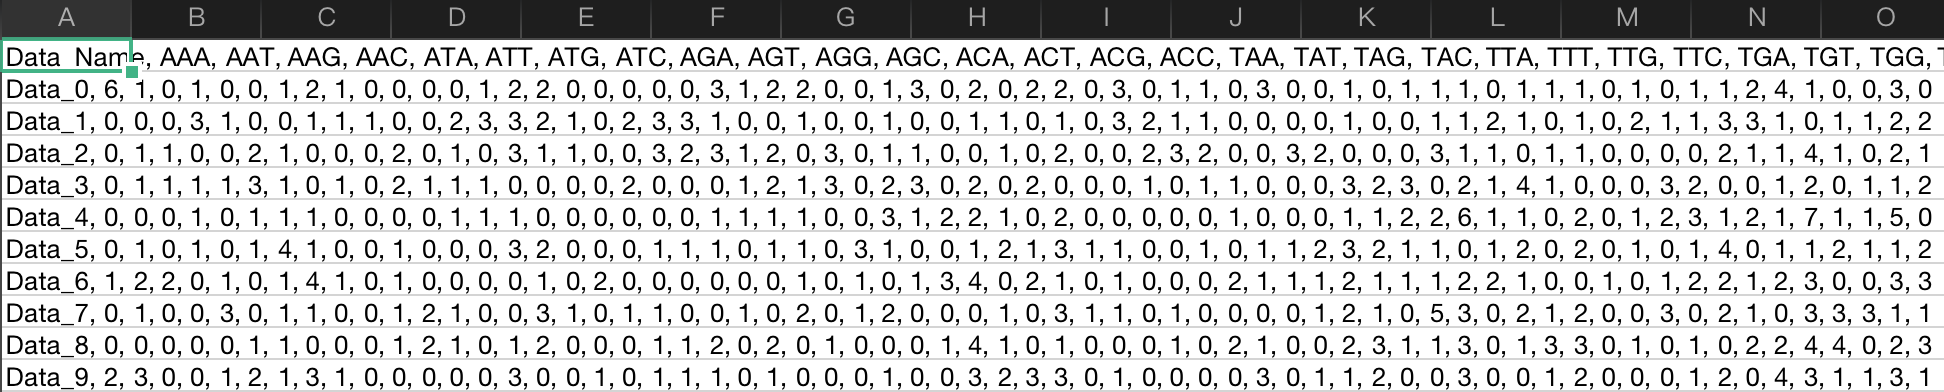

### 4. Lets see the sample of the result of our csv file using pandas dataframe

In [47]:
import pandas as pd

dataset = pd.read_csv(csv_file_name)

dataset.sample(n = 10)

,Data_Name,AAA,AAT,AAG,AAC,ATA,ATT,ATG,ATC,AGA,AGT,AGG,AGC,ACA,ACT,ACG,ACC,TAA,TAT,TAG,TAC,TTA,TTT,TTG,TTC,TGA,TGT,TGG,TGC,TCA,TCT,TCG,TCC,GAA,GAT,GAG,GAC,GTA,GTT,GTG,GTC,GGA,GGT,GGG,GGC,GCA,GCT,GCG,GCC,CAA,CAT,CAG,CAC,CTA,CTT,CTG,CTC,CGA,CGT,CGG,CGC,CCA,CCT,CCG,CCC,Species
529,AV_529,1,1,1,0,0,1,0,1,0,0,1,4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,2,0,0,0,1,0,0,0,1,1,0,2,3,4,0,6,3,2,1,5,0,0,1,0,0,0,1,3,5,2,1,2,1,Agrobacterium Vitis
61,AV_61,2,0,3,2,0,0,0,1,1,0,2,1,0,0,3,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,1,3,1,0,3,0,0,0,0,1,0,2,3,0,2,2,2,2,0,1,0,0,0,2,1,4,0,2,2,3,1,1,3,Agrobacterium Vitis
96,AV_96,0,1,2,0,0,1,1,2,0,1,0,1,1,0,2,1,0,1,0,0,0,1,0,1,1,2,0,0,2,2,2,3,2,0,0,2,0,1,0,5,0,2,0,0,1,1,1,0,1,1,0,2,1,0,2,1,3,1,2,2,0,1,3,0,Agrobacterium Vitis
45,AV_45,1,0,1,2,1,0,1,0,1,0,3,0,1,2,1,0,1,0,0,1,0,0,0,1,2,0,2,2,0,1,1,0,2,2,0,1,0,1,0,1,2,2,5,2,1,2,0,3,0,0,2,0,1,0,5,0,0,0,1,2,0,2,1,0,Agrobacterium Vitis
269,AV_269,3,0,1,1,0,1,2,0,0,0,2,1,1,0,3,0,0,0,1,0,0,0,1,0,1,0,2,0,2,0,1,1,2,2,0,1,0,0,0,2,1,2,3,3,1,1,2,0,0,1,1,2,1,0,0,1,3,0,2,0,0,1,0,0,Agrobacterium Vitis
144,AV_144,2,1,0,2,2,0,0,1,0,1,0,3,3,0,2,0,2,0,0,1,0,2,0,2,1,0,1,1,1,2,1,0,0,1,0,3,1,0,2,0,1,1,1,0,1,2,2,1,1,1,4,0,0,2,1,1,2,1,0,2,1,0,0,0,Agrobacterium Vitis
70,AV_70,3,0,2,0,0,2,1,0,0,1,3,1,1,0,0,3,0,1,0,0,0,2,0,2,0,0,2,0,1,1,0,1,1,1,0,3,0,0,1,1,2,1,1,2,2,0,0,2,1,0,3,1,1,0,0,0,3,0,0,1,2,0,4,3,Agrobacterium Vitis
518,AV_518,0,0,0,1,0,0,1,1,0,0,1,2,2,0,2,1,0,1,0,1,1,1,0,1,2,0,0,0,0,2,2,1,0,1,1,3,0,0,0,0,1,0,1,2,2,1,1,3,1,1,2,0,1,2,1,3,2,0,2,3,0,4,1,1,Agrobacterium Vitis
207,AV_207,1,2,1,0,0,2,0,1,0,1,2,3,0,0,1,1,0,1,1,0,2,1,3,1,2,0,1,1,1,0,1,1,1,0,1,1,0,3,2,1,1,2,0,1,2,1,0,2,1,0,3,1,0,1,0,0,0,3,1,0,2,0,2,0,Agrobacterium Vitis
306,AV_306,3,1,2,0,0,0,0,3,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,2,0,1,0,2,2,3,1,3,1,0,0,1,0,1,0,1,0,0,0,1,0,2,3,2,2,2,0,1,0,2,2,3,2,1,0,2,3,2,0,0,Agrobacterium Vitis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c9d2b0a10>,
      dtype=object)

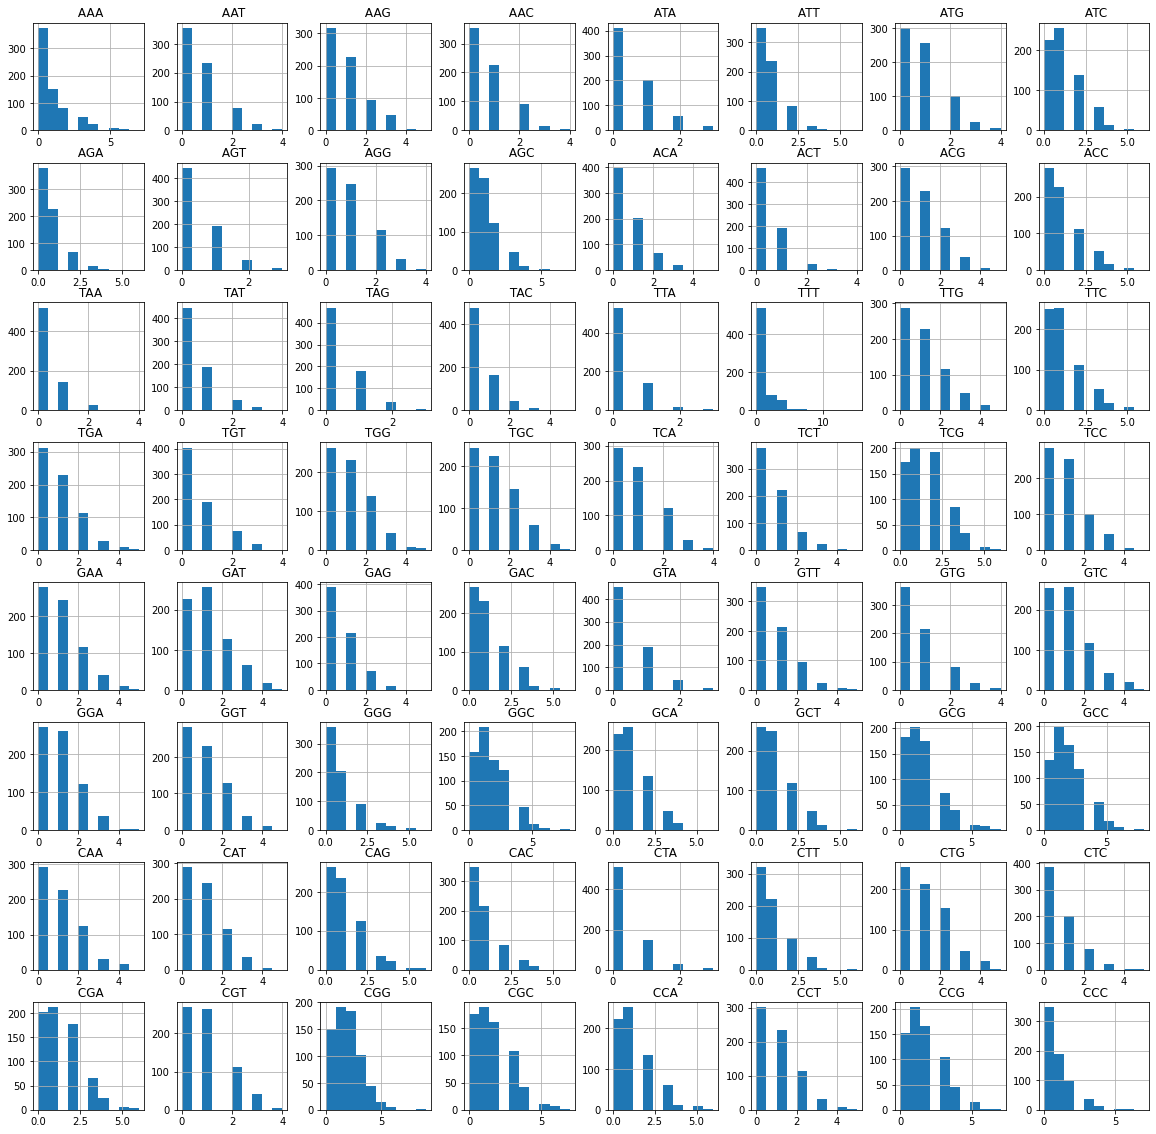

In [48]:
#Checking the histogram of each feature on the dataset

dataset.hist(figsize=(20,20))